# Analyse des Vulnérabilités - Visualisations et Interprétations
### Ce notebook présente une série de visualisations basées sur les données des vulnérabilités recensées. 

Les graphiques permettront de mieux comprendre la distribution des vulnérabilités, leurs gravités, et les produits les plus impactés.

## Import des bibliothèques nécessaires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données
Note : Remplacez `data` par vos données réelles.

In [3]:
data = {
    'Titre ANSSI': [
        'Alerte : Vulnérabilité critique dans Apache',
        'Avis : Vulnérabilité dans Ivanti Policy Secure',
        'Alerte : Vulnérabilité dans Nginx',
        'Avis : Vulnérabilité dans Cisco ASA',
        'Alerte : Vulnérabilité dans Microsoft Exchange',
        'Avis : Vulnérabilité dans Fortinet FortiGate',
        'Alerte : Vulnérabilité dans OpenSSL',
        'Avis : Vulnérabilité dans VMware vSphere',
        'Alerte : Vulnérabilité dans MySQL',
        'Avis : Vulnérabilité dans Docker',
        'Alerte : Vulnérabilité dans Kubernetes',
        'Avis : Vulnérabilité dans Apache Tomcat',
        'Alerte : Vulnérabilité dans Redis',
        'Avis : Vulnérabilité dans Google Chrome',
        'Alerte : Vulnérabilité dans PostgreSQL',
        'Avis : Vulnérabilité dans Oracle WebLogic',
        'Alerte : Vulnérabilité dans Jenkins',
        'Avis : Vulnérabilité dans Wireshark',
        'Alerte : Vulnérabilité dans Samba',
        'Avis : Vulnérabilité dans GitLab'
    ],
    'Type': ['Alerte', 'Avis', 'Alerte', 'Avis', 'Alerte', 'Avis', 'Alerte', 'Avis', 'Alerte', 'Avis', 'Alerte', 'Avis', 'Alerte', 'Avis', 'Alerte', 'Avis', 'Alerte', 'Avis', 'Alerte', 'Avis'],
    'Date': ['2024-06-01', '2024-06-05', '2024-06-10', '2024-06-12', '2024-06-15', '2024-06-17', '2024-06-20', '2024-06-22', '2024-06-25', '2024-06-30', '2024-07-01', '2024-07-05', '2024-07-07', '2024-07-10', '2024-07-12', '2024-07-15', '2024-07-18', '2024-07-20', '2024-07-22', '2024-07-23'],
    'CVE': [
        'CVE-2023-46805', 'CVE-2024-21887', 'CVE-2024-11234', 'CVE-2024-11345', 'CVE-2024-11567', 
        'CVE-2024-11678', 'CVE-2024-11987', 'CVE-2024-12012', 'CVE-2024-12123', 'CVE-2024-12234',
        'CVE-2024-12345', 'CVE-2024-12456', 'CVE-2024-12567', 'CVE-2024-12678', 'CVE-2024-12789',
        'CVE-2024-12890', 'CVE-2024-12901', 'CVE-2024-13012', 'CVE-2024-13123', 'CVE-2024-13234'
    ],
    'CVSS Base': [8.2, 9.0, 7.5, 8.5, 9.0, 8.7, 7.0, 7.8, 8.1, 7.9, 8.0, 7.6, 7.8, 8.2, 8.4, 7.9, 8.3, 8.1, 7.7, 8.0],
    'Severity': ['High', 'Critical', 'High', 'Medium', 'Critical', 'High', 'Medium', 'High', 'High', 'Medium', 'Critical', 'High', 'High', 'Medium', 'High', 'High', 'Critical', 'Medium', 'High', 'Critical'],
    'CWE': [
        'CWE-287 (Authentication Bypass)', 'CWE-77 (Command Injection)', 'CWE-78 (OS Command Injection)', 
        'CWE-119 (Buffer Overflow)', 'CWE-119 (Buffer Overflow)', 'CWE-120 (Buffer Copy without Size Checking)', 
        'CWE-79 (Improper Neutralization of Input During Web Page Generation)', 'CWE-79 (Cross-Site Scripting)', 
        'CWE-119 (Buffer Overflow)', 'CWE-77 (Command Injection)', 'CWE-79 (Cross-Site Scripting)', 
        'CWE-119 (Buffer Overflow)', 'CWE-120 (Buffer Copy without Size Checking)', 'CWE-119 (Buffer Overflow)', 
        'CWE-284 (Improper Access Control)', 'CWE-287 (Authentication Bypass)', 'CWE-119 (Buffer Overflow)', 
        'CWE-78 (OS Command Injection)', 'CWE-79 (Cross-Site Scripting)', 'CWE-120 (Buffer Copy without Size Checking)'
    ],
    'EPSS': [0.85, 0.92, 0.78, 0.65, 0.90, 0.75, 0.88, 0.77, 0.80, 0.85, 0.91, 0.70, 0.72, 0.88, 0.79, 0.90, 0.85, 0.92, 0.87, 0.75],
    'Lien': [
        'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 
        'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 
        'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 
        'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 
        'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 
        'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...', 
        'https://www.cert.ssi.gouv.fr/...', 'https://www.cert.ssi.gouv.fr/...'
    ],
    'Description': [
        'An authentication bypass vulnerability...', 'A command injection vulnerability allows execution.', 
        'Remote code execution vulnerability...', 'Memory corruption vulnerability...', 'Privilege escalation vulnerability...', 
        'Cross-site scripting vulnerability...', 'Directory traversal vulnerability...', 'SQL injection vulnerability...', 
        'Path traversal vulnerability...', 'Denial of service vulnerability...', 'Command injection vulnerability...', 
        'Improper authentication vulnerability...', 'Out-of-bounds read vulnerability...', 'Privilege escalation vulnerability...', 
        'File inclusion vulnerability...', 'Cross-site scripting vulnerability...', 'Code execution vulnerability...', 
        'Stack buffer overflow vulnerability...', 'Out-of-bounds write vulnerability...', 'Improper access control vulnerability...'
    ],
    'Éditeur': [
        'Ivanti', 'Ivanti', 'Nginx', 'Cisco', 'Microsoft', 'Fortinet', 'OpenSSL', 'VMware', 'MySQL', 'Docker', 
        'Kubernetes', 'Apache', 'Redis', 'Google', 'PostgreSQL', 'Oracle', 'Jenkins', 'Wireshark', 'Samba', 'GitLab'
    ],
    'Produit': [
        'ICS', 'IPS', 'Web Server', 'ASA', 'Exchange', 'FortiGate', 'OpenSSL', 'vSphere', 'MySQL', 'Docker', 
        'Kubernetes', 'Tomcat', 'Redis', 'Chrome', 'PostgreSQL', 'WebLogic', 'Jenkins', 'Wireshark', 'Samba', 'GitLab'
    ],
    'Versions affectées': [
        '9.1R18, 22.6R2', '9.1R18, 22.6R1', '1.18.0', '9.12', '2019-2023', '6.0', '1.1.1k', '7.0.0', '5.7', '20.10.7', 
        '1.21', '9.0.0', '6.0', '110.0', '13.3', '12.2', '2.5', '4.3', '4.3', '14.0'
    ]
}
df = pd.DataFrame(data)


## Configuration générale pour les graphiques

In [4]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

---
## Visualisations

### 1. Histogramme des scores CVSS

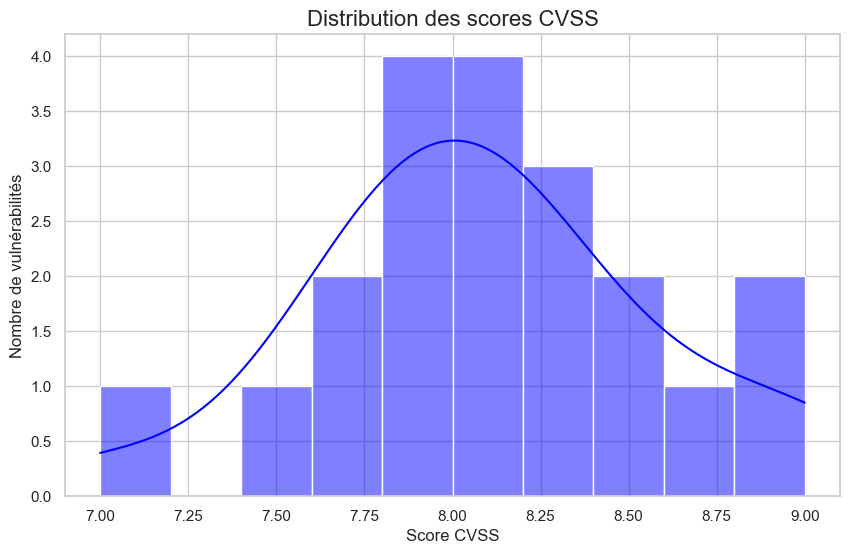

In [5]:
plt.figure()
sns.histplot(df['CVSS Base'], bins=10, kde=True, color='blue')
plt.title("Distribution des scores CVSS", fontsize=16)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.show()

### 2. Diagramme circulaire des types de vulnérabilités (CWE)

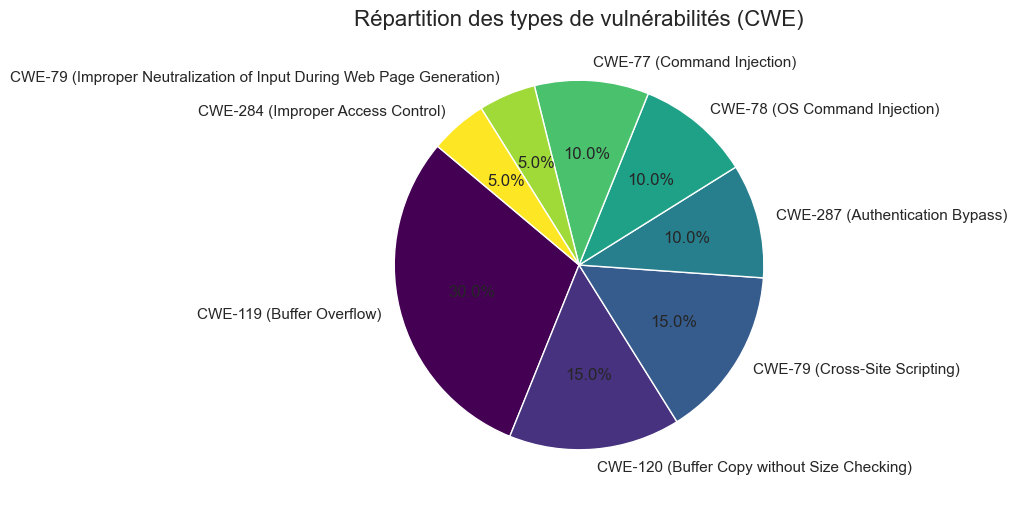

In [6]:
plt.figure()
cwe_counts = df['CWE'].value_counts()
cwe_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title("Répartition des types de vulnérabilités (CWE)", fontsize=16)
plt.ylabel("")
plt.show()

### 3. Courbe des scores EPSS

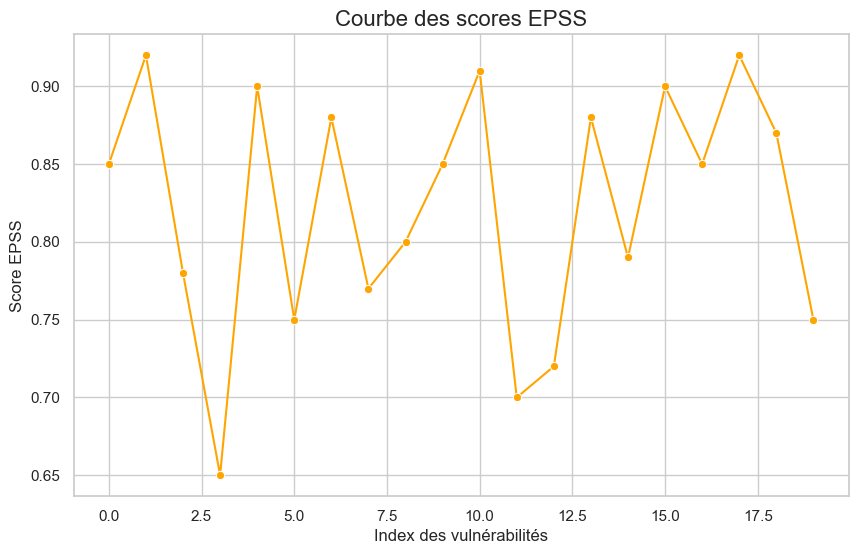

In [7]:
plt.figure()
sns.lineplot(x=range(len(df)), y='EPSS', data=df, marker='o', color='orange')
plt.title("Courbe des scores EPSS", fontsize=16)
plt.xlabel("Index des vulnérabilités", fontsize=12)
plt.ylabel("Score EPSS", fontsize=12)
plt.show()

### 4. Classement des produits les plus affectés

C:\Users\toino\AppData\Local\Temp\ipykernel_23344\355022463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts, y=product_counts.index, palette="Blues_d")


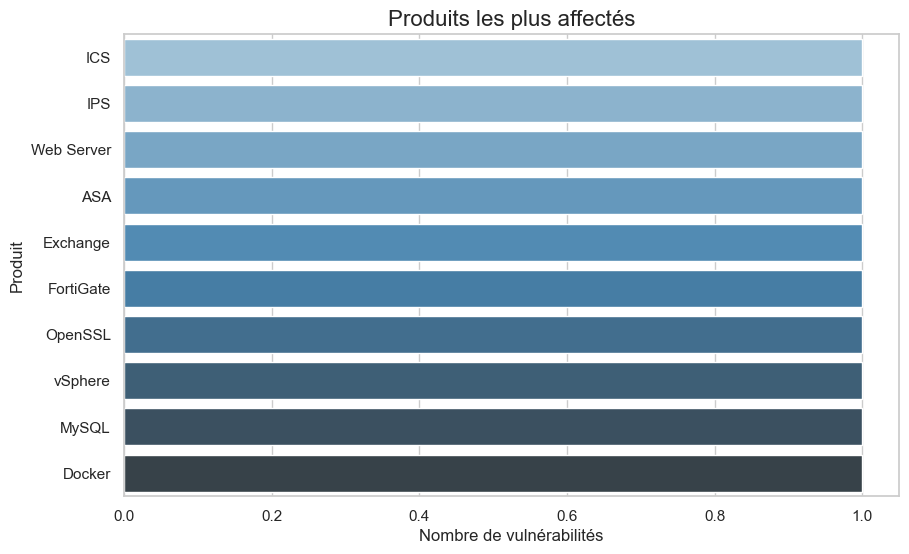

In [8]:
plt.figure()
product_counts = df['Produit'].value_counts().head(10)
sns.barplot(x=product_counts, y=product_counts.index, palette="Blues_d")
plt.title("Produits les plus affectés", fontsize=16)
plt.xlabel("Nombre de vulnérabilités", fontsize=12)
plt.ylabel("Produit", fontsize=12)
plt.show()

### 5. Heatmap des corrélations entre CVSS et EPSS

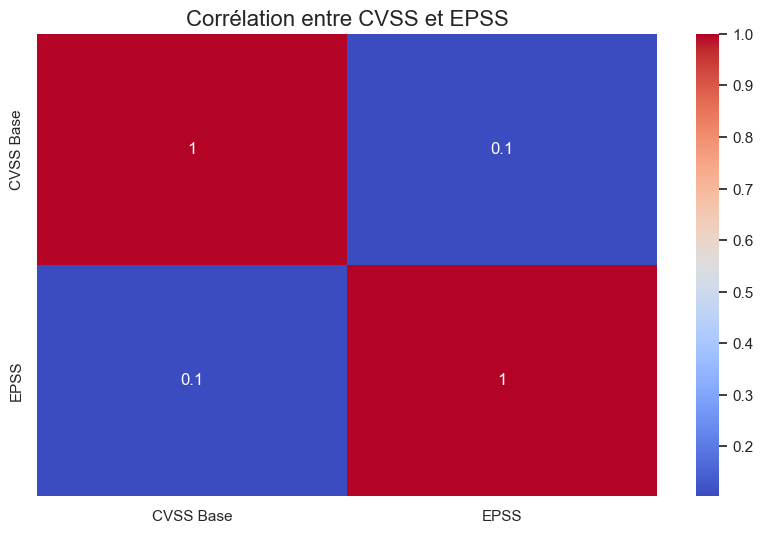

In [9]:
plt.figure()
corr_matrix = df[['CVSS Base', 'EPSS']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Corrélation entre CVSS et EPSS", fontsize=16)
plt.show()

### 6. Nuage de points entre CVSS et EPSS

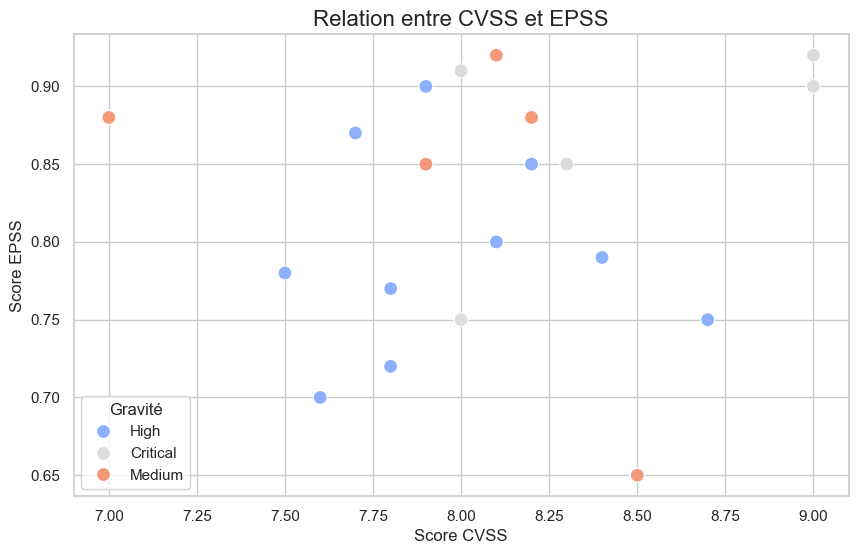

In [10]:
plt.figure()
sns.scatterplot(x='CVSS Base', y='EPSS', data=df, hue='Severity', palette='coolwarm', s=100)
plt.title("Relation entre CVSS et EPSS", fontsize=16)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Score EPSS", fontsize=12)
plt.legend(title="Gravité")
plt.show()

### 7. Boxplot des scores CVSS par éditeur

C:\Users\toino\AppData\Local\Temp\ipykernel_23344\955228156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Éditeur', y='CVSS Base', data=df, palette='Set3')


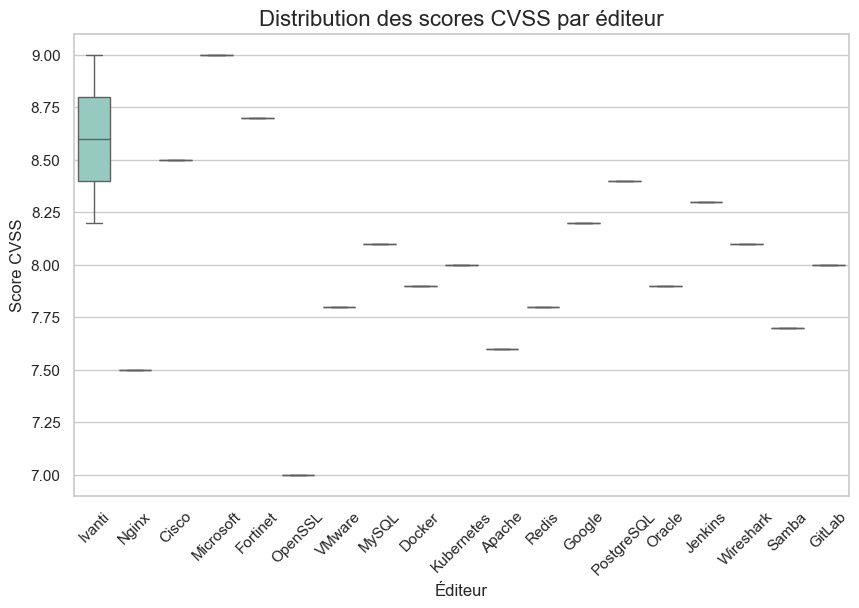

In [11]:
plt.figure()
sns.boxplot(x='Éditeur', y='CVSS Base', data=df, palette='Set3')
plt.title("Distribution des scores CVSS par éditeur", fontsize=16)
plt.xlabel("Éditeur", fontsize=12)
plt.ylabel("Score CVSS", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 8. Évolution temporelle du nombre de vulnérabilités détectées

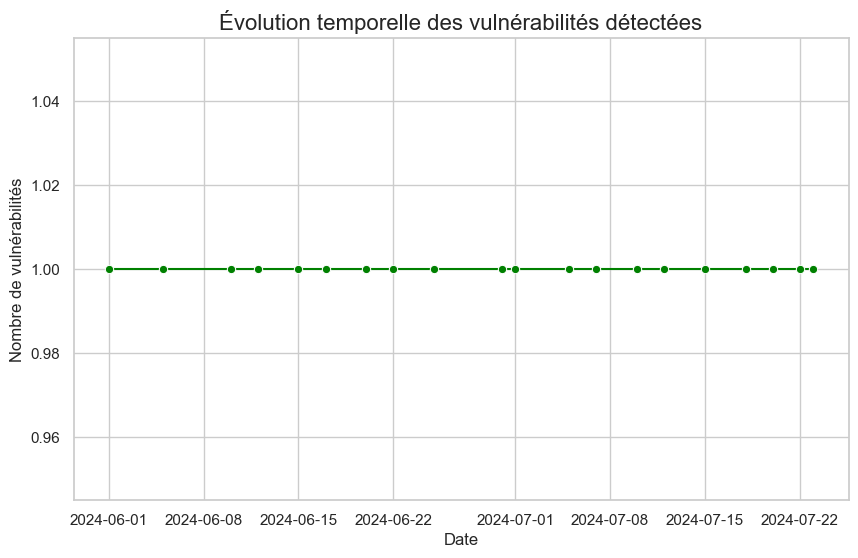

In [12]:
df['Date'] = pd.to_datetime(df['Date'])  # Conversion en format datetime
vuln_per_date = df.groupby('Date').size()
plt.figure()
sns.lineplot(x=vuln_per_date.index, y=vuln_per_date.values, marker='o', color='green')
plt.title("Évolution temporelle des vulnérabilités détectées", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.show()